In [4]:
from ultralytics import YOLO
from PIL import Image
import pandas as pd

In [5]:
try:
    model = YOLO("best.pt")
except Exception as e:
    print(f"Error with loading model: {e}")

In [6]:
image_path = "/home/user/Documents/ECE140/SurfWatch/IOT/captures/test2.JPG"

In [7]:
from PIL import Image
import os
import math # For math.ceil

def split_image_into_tiles(
    image_path, tile_size=(320, 320), padding_color=(255, 255, 255)
):
    try:
        
        img = Image.open(image_path)
    except Exception as e:
        print(f"Error: Image file not found at {image_path}")
        return []

    original_width, original_height = img.size
    tile_w, tile_h = tile_size

    effective_padding_color = padding_color

    padded_width = math.ceil(original_width / tile_w) * tile_w
    padded_height = math.ceil(original_height / tile_h) * tile_h

    padded_img = Image.new(
        img.mode, (padded_width, padded_height), effective_padding_color
    )

    # Paste the original image onto the top-left corner of the padded image
    padded_img.paste(img, (0, 0))

    tiles = []
    for y_offset in range(0, padded_height, tile_h):
        for x_offset in range(0, padded_width, tile_w):
            # Define the cropping box (left, upper, right, lower)
            box = (x_offset, y_offset, x_offset + tile_w, y_offset + tile_h)
            tile = padded_img.crop(box)
            tiles.append(tile)

    print(
        f"Original image size: {original_width}x{original_height}"
    )
    if padded_width > original_width or padded_height > original_height:
        print(
            f"Padded image to: {padded_width}x{padded_height} for consistent tiling."
        )
    print(f"Split into {len(tiles)} tiles of size {tile_w}x{tile_h}.")
    return tiles

In [8]:
tiles = split_image_into_tiles(image_path)


Original image size: 4032x3024
Padded image to: 4160x3200 for consistent tiling.
Split into 130 tiles of size 320x320.


In [30]:
i=71

In [1]:
import torch

In [9]:
torch.cuda.is_available()

True

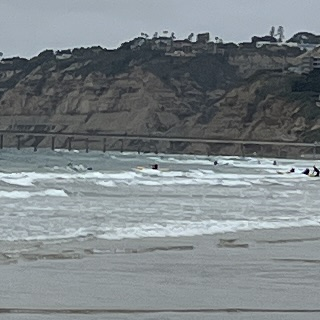

In [40]:

tiles[72]


In [11]:
num_surf = 0
for img in tiles:
    results = model(source=img, save=True, conf=0.2, device='0', imgsz=320)
    num_surf += len(results[0].boxes.conf)


Ultralytics 8.3.146 🚀 Python-3.10.16 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5815MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
0: 320x320 (no detections), 8.3ms
Speed: 0.6ms preprocess, 8.3ms inference, 13.0ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /home/user/Documents/ECE140/SurfWatch/runs/detect/predict7

0: 320x320 (no detections), 8.0ms
Speed: 0.7ms preprocess, 8.0ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /home/user/Documents/ECE140/SurfWatch/runs/detect/predict7

0: 320x320 (no detections), 8.3ms
Speed: 0.5ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /home/user/Documents/ECE140/SurfWatch/runs/detect/predict7

0: 320x320 (no detections), 8.5ms
Speed: 0.6ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /home/user/Documents/ECE140/SurfWatch

In [49]:
results = model(source=tiles[72], save=False, conf=0.20, device='cpu', imgsz=320)
results[0].show()
len(results[0].boxes.conf)



0: 320x320 7 surfers, 84.2ms
Speed: 14.2ms preprocess, 84.2ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 320)


7

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':0'


In [37]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (320, 320)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

In [23]:
len(results[0].boxes.conf)

14

In [12]:
num_surf

40